
# Classification of  hand-written digits using scikit-learn
# PART 2: performance metrics

An example showing how we can classify hand-written digits using scikit-learn. 
The example is adapted from 

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html



Import required python packages

In [1]:
from sklearn import datasets, svm, metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
#set a random state
np.random.seed(30)


Load the dataset

In [2]:
digits = datasets.load_digits()

Print the dataset. The dataset consists of two main parts:
1. digits.data is the input (flattened pixel values for each handwritten image)

2. digits.target is the output (ground-truth labels)


We can obtain the number of data points using .shape command 

In [3]:
digits.data.shape

(1797, 64)

plot the digits.data with associated labels

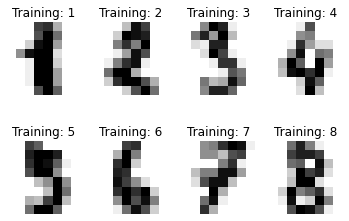

In [4]:
fig = plt.figure()
for index in range(8):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(digits.data[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[index+1])

Pixel values will be the input (X) and labels will be the output (y)

In [5]:
X = digits.data
y= digits.target

Split data into train and test subsets

In [6]:
indx_selected = np.concatenate([np.where(y == 8),np.where(y == 9)], axis = 1)[0]
X_train, X_test, y_train, y_test = train_test_split(X[indx_selected], y[indx_selected], test_size=0.5, shuffle=True)

Import different classifiers

In [16]:
# Multinomial Naive Bayes Classifier  
def naive_bayes_classifier(train_x, train_y):   
    model = MultinomialNB(alpha=0.01)  
    model.fit(train_x, train_y)  
    return model  
  
# KNN Classifier  
def knn_classifier(train_x, train_y):   
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(train_x, train_y)  
    return model  
  
# Logistic Regression Classifier  
def logistic_regression_classifier(train_x, train_y):    
    model = LogisticRegression(penalty='l2')  
    model.fit(train_x, train_y)  
    return model  
  
# Random Forest Classifier  
def random_forest_classifier(train_x, train_y):    
    model = RandomForestClassifier(n_estimators=3)  
    model.fit(train_x, train_y)  
    return model  
  
# GBDT(Gradient Boosting Decision Tree) Classifier  
def gradient_boosting_classifier(train_x, train_y):   
    model = GradientBoostingClassifier(n_estimators=200)  
    model.fit(train_x, train_y)  
    return model  
  

# SVM Classifier  
def svm_classifier(train_x, train_y):    
    model = SVC(kernel='rbf', probability=True)  
    model.fit(train_x, train_y)  
    return model  
  
#MLP Classifier
def mlp_classifier(train_x,train_y):
    model =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=15, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    model.fit(train_x,train_y)
    return model

Choose a classifier:

In [17]:
model = random_forest_classifier(X_train, y_train)

Now predict the value of the digit of the test dataset

In [18]:
predicted = model.predict(X_test)

Compute the prediction accuracy

In [19]:
accuracy = metrics.accuracy_score(y_test, predicted)  
print ('classification accuracy : %.2f%%' % (100 * accuracy))

classification accuracy : 92.09%


plot test data with predicted labels

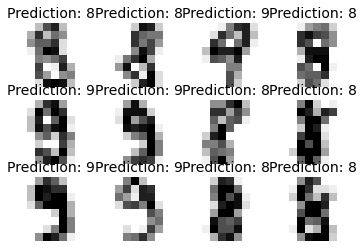

In [20]:
fig = plt.figure()
for index in range(12):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.imshow(X_test[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % predicted[index+1], fontsize = 14)

We want to know the classification accuracy for each number. We can use a for loop to do it

Plot the prediction accuracy for each label (8 to 9)

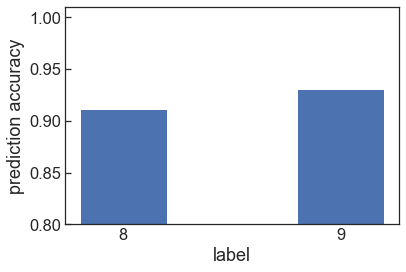

In [115]:
#assign an empty list
num_acc = []
for i in np.arange(8,10,1):
    #find the index of each number (0 to 9) in the label
    idx = np.where(y_test == i)
    num_acc.append(metrics.accuracy_score(y_test[idx], predicted[idx]))

    
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})

plt.bar(np.arange(8,10,1),num_acc, width = 0.4)
plt.ylim(0.8,1.01)
plt.xticks(np.arange(8,10,1))
plt.xlabel ('label')
plt.ylabel('prediction accuracy')
plt.show()

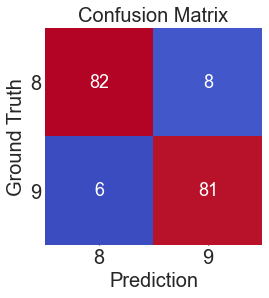

In [180]:
from sklearn.metrics import (onfusion_matrix
conf_matrix = pd.DataFrame(confusion_matrix(y_test, predicted), columns = np.arange(2)+8, index = np.arange(2)+8)

df_len = len(conf_matrix)
fs = 20

fig, ax=plt.subplots(figsize=(df_len*2,df_len*2))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
cmap = plt.get_cmap('coolwarm')
sns.heatmap(conf_matrix, cbar_kws={"shrink": .2}, annot=True,
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_ylabel('Ground Truth',fontsize = fs)
ax.set_xlabel('Prediction',fontsize = fs)
ax.set_title("Confusion Matrix", fontsize = 20)
plt.xticks(rotation=0, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs) 
plt.show()

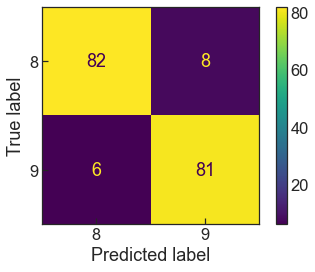

In [182]:
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

#### Precision = TP/(TP+FP)

In the case of Digit 8: 82/(82+6)

#### Recall = TP/(TP+FN）

In the case of Digit 8: 82/(82+8)

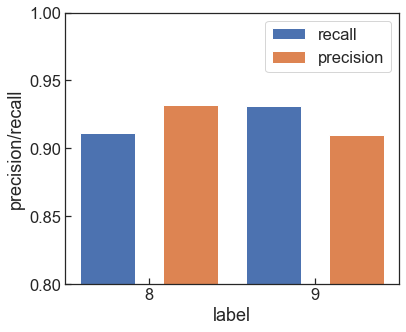

In [99]:
num_recall = []
num_precision = []
for i in np.arange(8,10,1):
    #find the index of each number (8 to 9) in the label
    idx = np.where(y_test == i)
    num_precision.append(metrics.precision_score(y_test, predicted, pos_label = i))
    num_recall.append(metrics.recall_score(y_test, predicted, pos_label = i))
plt.subplots(figsize = (6,5))
plt.bar(np.arange(8,10,1)-0.25,num_recall, width = 0.33, label = 'recall')
plt.bar(np.arange(8,10,1)+0.25,num_precision, width = 0.33, label = 'precision')

plt.xlabel ('label')
plt.xticks(np.arange(8,10,1))
plt.ylabel('precision/recall')
plt.ylim(0.8,1.0)
plt.yticks(np.arange(0.8, 1.01, 0.05))

plt.legend()
plt.show()

### Imbalanced dataset

Now we want to explore how an imbalanced dataset will impact on the classification accuracy. The previous dataset we have is pretty balanced. We can use a histogram to visualize the frequency for each label

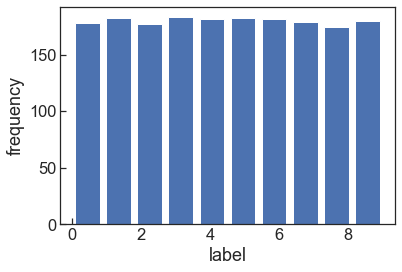

In [100]:
plt.hist (y, rwidth = 0.8)
plt.xlabel ('label')
plt.ylabel('frequency')
plt.show()

In [136]:
#find the index of label 8 
idx_1 = np.where(y==8)[0]
y_imba = np.delete(y,idx_1[:140],None)
X_imba = np.delete(X,idx_1[:140],0)

Text(0, 0.5, 'frequency')

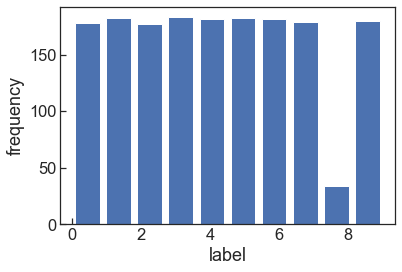

In [137]:
plt.hist (y_imba, rwidth = 0.8)
plt.xlabel ('label')
plt.ylabel('frequency')

In [138]:
indx_selected = np.concatenate([np.where(y_imba == 8),np.where(y_imba == 9)], axis = 1)[0]

X_train_imba, X_test_imba, y_train_imba, y_test_imba = train_test_split(
    X_imba[indx_selected], y_imba[indx_selected], test_size=0.5, shuffle=True)



Choose a classifier:


In [139]:
model_imba = random_forest_classifier(X_train_imba, y_train_imba)

Now predict the value of the digit of the test dataset


In [140]:
predicted_imba = model_imba.predict(X_test_imba)

In [141]:
#compute the accuracy for all labels in the imbalanced dataset
accuracy_imba = metrics.accuracy_score(y_test_imba, predicted_imba)

accuracy = metrics.accuracy_score(y_test, predicted)  
print ('classification accuracy of original datasset : %.2f%%' % (100 * accuracy))
print ('classification accuracy of imbalanced datasset : %.2f%%' % (100 * accuracy_imba))

classification accuracy of original datasset : 92.09%
classification accuracy of imbalanced datasset : 90.65%


In [142]:
num_acc_imba = []
for i in np.arange(8,10,1):
    #find the index of each number (8 to 9) in the label
    idx = np.where(y_test_imba == i)
    num_acc_imba.append(metrics.accuracy_score(y_test_imba[idx], predicted_imba[idx]))

Plot the prediction accuracy for each label (8 to 9)

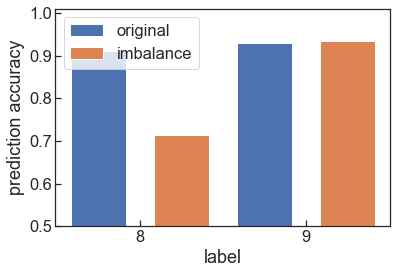

In [144]:
width = 0.33 # the width of the bars
plt.bar(np.arange(8,10,1)-0.25,num_acc,width, label = 'original')
plt.bar(np.arange(8,10,1)+0.25,num_acc_imba, width,label = 'imbalance')
plt.ylim(0.5,1.01)
plt.xticks(np.arange(8,10,1))
plt.xlabel ('label')
plt.ylabel('prediction accuracy')
plt.legend()

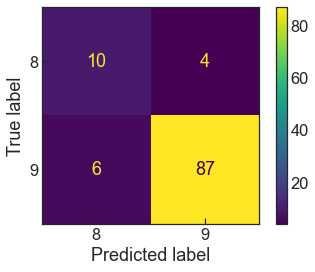

In [183]:
metrics.plot_confusion_matrix(model_imba, X_test_imba, y_test_imba)
plt.show()

#### Precision = TP/(TP+FP)
In the case of digit 8: 10/(10+6)

#### Recall = TP/(TP+FN）
In the case of digit 8: 10/(10+4)

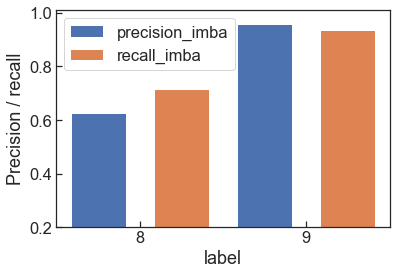

In [146]:
num_recall_imba = []
num_precision_imba = []
for i in np.arange(8,10,1):
    #find the index of each number (8 to 9) in the label
    idx = np.where(y_test_imba == i)
    num_recall_imba.append(metrics.recall_score(y_test_imba, predicted_imba, pos_label = i))
    num_precision_imba.append(metrics.precision_score(y_test_imba, predicted_imba, pos_label = i))

width = 0.33 # the width of the bars
plt.bar(np.arange(8,10,1)-0.25,num_precision_imba,width, label = 'precision_imba')
plt.bar(np.arange(8,10,1)+0.25,num_recall_imba, width,label = 'recall_imba')
plt.ylim(0.2,1.01)
plt.xticks(np.arange(8,10,1))
plt.xlabel ('label')
plt.ylabel('Precision / recall')
plt.legend()

### Overall Average Performance Metrics

`'micro'`:
Calculate metrics globally by counting the total true positives, false negatives and false positives.

`'macro'`:
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

`'weighted'`:
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

#### balanced dataset

In [166]:
print('balanced dataset')
print('micro', np.round(metrics.recall_score(y_test, predicted, average = 'micro'),2))
print('macro',np.round(metrics.recall_score(y_test, predicted, average = 'macro'),2))
print('weighted',np.round(metrics.recall_score(y_test, predicted, average = 'weighted'),2))

balanced dataset
micro 0.92
macro 0.92
weighted 0.92


In [167]:
print('balanced dataset')
print('micro', np.round(metrics.precision_score(y_test, predicted, average = 'micro'),2))
print('macro',np.round(metrics.precision_score(y_test, predicted, average = 'macro'),2))
print('weighted',np.round(metrics.precision_score(y_test, predicted, average = 'weighted'),2))

balanced dataset
micro 0.92
macro 0.92
weighted 0.92


In [168]:
print('balanced dataset')
print('f1 micro', np.round(metrics.f1_score(y_test, predicted, average = 'micro'),2))
print('f1 macro',np.round(metrics.f1_score(y_test, predicted, average = 'macro'),2))
print('f1 weighted',np.round(metrics.f1_score(y_test, predicted, average = 'weighted'),2))

balanced dataset
f1 micro 0.92
f1 macro 0.92
f1 weighted 0.92


#### imbalanced dataset

In [169]:
print('imbalanced dataset')
print('recall micro', np.round(metrics.recall_score(y_test_imba, predicted_imba, average = 'micro'),2))
print('recall macro', np.round(metrics.recall_score(y_test_imba, predicted_imba, average = 'macro'),2))
print('recall weighted',np.round(metrics.recall_score(y_test_imba, predicted_imba, average = 'weighted'),2))

imbalanced dataset
recall micro 0.91
recall macro 0.82
recall weighted 0.91


In [170]:
print('imbalanced dataset')
print('precision micro', np.round(metrics.precision_score(y_test_imba, predicted_imba, average = 'micro'),2))
print('precision macro',np.round(metrics.precision_score(y_test_imba, predicted_imba, average = 'macro'),2))
print('precision weighted',np.round(metrics.precision_score(y_test_imba, predicted_imba, average = 'weighted'),2))

imbalanced dataset
precision micro 0.91
precision macro 0.79
precision weighted 0.91


In [171]:
print('imbalanced dataset')
print('precision micro', np.round(metrics.f1_score(y_test_imba, predicted_imba, average = 'micro'),2))
print('precision macro',np.round(metrics.f1_score(y_test_imba, predicted_imba, average = 'macro'),2))
print('precision weighted',np.round(metrics.f1_score(y_test_imba, predicted_imba, average = 'weighted'),2))

imbalanced dataset
precision micro 0.91
precision macro 0.81
precision weighted 0.91
